In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Figure和Subplot
matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure：

In [2]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

不能通过空Figure绘图，必须用add_subplot创建一个或多个subplot才行：

In [3]:
# 创建2x2的图像，且当前选中的4个subplot中的第一个（编号从1开始）
ax1 = fig.add_subplot(2, 2, 1)

In [4]:
ax2 = fig.add_subplot(2, 2, 2)

In [5]:
ax3 = fig.add_subplot(2, 2, 3)

In [6]:
from numpy.random import randn

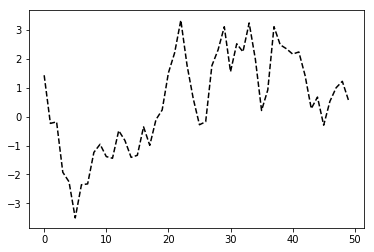

In [11]:
# 'k--'是一个线型选项，用于告诉matplotlib绘制黑色虚线图
plt.plot(randn(50).cumsum(), 'k--')

In [14]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)

In [16]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

由于根据特定布局创建Figure和subplot是一个非常常见的任务，于是便出现了一个更为方便的方法（plt.subplots），它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

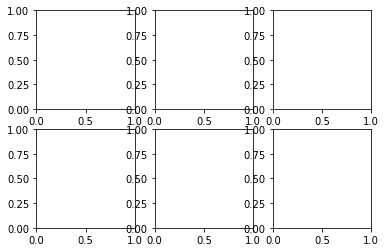

In [17]:
fig, axes = plt.subplots(2, 3)

这是非常实用的，因为可以轻松对axes数组进行索引，就好像是一个二维数组一样。

In [19]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F8FA5F8>,
      dtype=object)

### 调整subplot周围的间距
默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果你调整了图形的大小，间距也会调整，利用Figure的subplots_adjust方法可以轻而易举地修改间距。

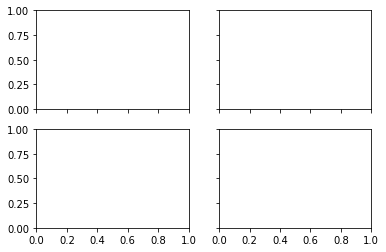

In [26]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [27]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
# map(lambda x: x.hist(randn(500), bins=50, color='k', alpha=0.5), axes)

In [28]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001286DB70>,
      dtype=object)

In [29]:
plt.subplots_adjust(wspace=0, hspace=0)

<Figure size 432x288 with 0 Axes>

### 颜色、标记和线型
matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。例如，要根据x和y绘制绿色虚线，你可以执行如下代码

In [32]:
# axes[0, 0].plot(x, y, 'g--')

In [33]:
# ax.plot(x, y, linestyle='--', color='g')

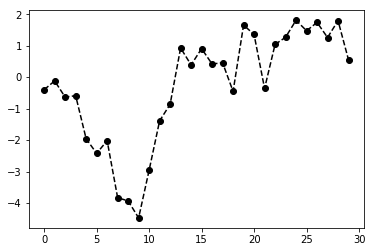

In [35]:
# 带标记的线型图
plt.plot(randn(30).cumsum(), 'ko--')

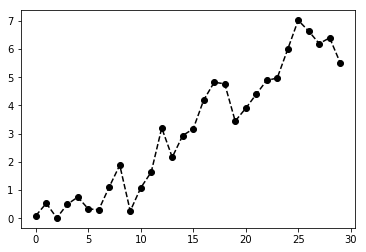

In [36]:
# 可以显示的写成
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改：

In [40]:
data = randn(30).cumsum()

In [41]:
data

array([ 2.59373314,  1.49364147,  1.86736022,  0.49441954,  0.24530883,
        1.62145377,  0.60474504,  0.8162459 ,  2.10623617,  1.14679718,
        1.19382407, -0.45877326, -1.12051276,  0.93198313,  1.91101825,
        1.19786239,  1.130492  , -0.40834564, -0.21078003, -0.36427553,
       -1.44118973, -1.64519932, -2.14254026, -2.03587425, -2.55714439,
       -2.59213224, -3.04193549, -1.36063514, -1.3528187 , -2.5877742 ])

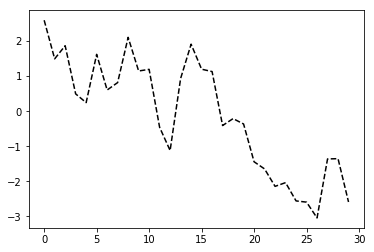

In [42]:
plt.plot(data, 'k--', label='Default')

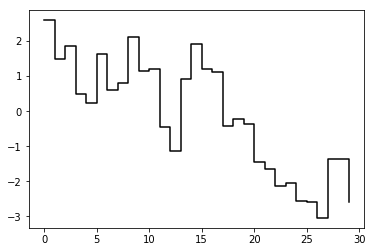

In [44]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

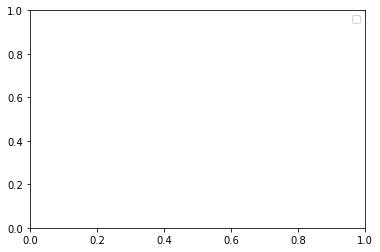

In [49]:
plt.legend(loc='best')

### 刻度、标签和图例

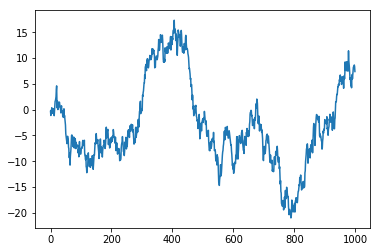

In [53]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1); ax.plot(randn(1000).cumsum())

要修改X轴的刻度，最简单的方法是使用set_xticks和set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的那些位置，默认情况下，这些位置也就是刻度标签。但我们可以通过set_xticklabels将任何其他的值用作标签：

Text(0.5,0,'Stages')

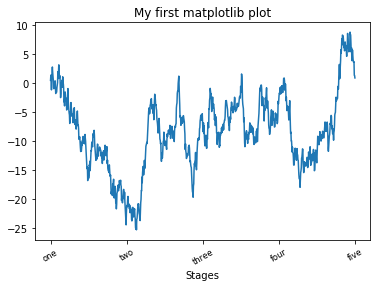

In [62]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1); ax.plot(randn(1000).cumsum())
tcks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
# 最后，再用set_xlabel将X轴设置一个名称，并用set_title设置一个标题：
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### 添加图例
图例（legend）是另一种用于标识图表元素的重要工具。添加图例的方式有二。最简单的是在添加subplot的时候传入label参数：

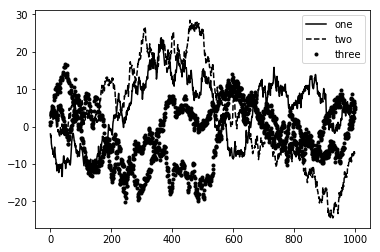

In [83]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
# 要从图例中去除一个或多个元素，不传入label或传入label='_nolegend_'即可
ax.plot(randn(1000).cumsum(), 'k.', label='_nolegend_')
# 调用ax.legend()或plt.legend()来自动创建图例；loc告诉matplotlib要将图例放在哪
ax.legend(loc='best')

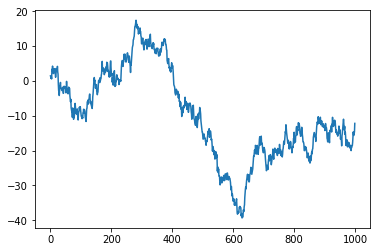

In [75]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

### 注解以及在Subplot上绘图
除标准的图标对象之外，你可能还希望绘制一些自动以的注解（比如文本，箭头或其他图形等）。

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

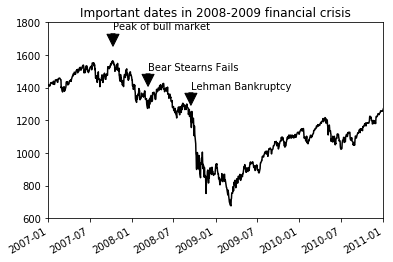

In [98]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(
        label, xy=(date, spx.asof(date) +100),
        xytext=(date, spx.asof(date) + 250),
        arrowprops=dict(facecolor='black'),
        horizontalalignment='left',
        verticalalignment='top'
    )

# 放大到2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')